<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r8-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-1-r8.csv?token=AKVFSOCOQGT3T2W6ORFAWJC63I4NU')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-11-r8.csv?token=AKVFSOC4TLQUBVRJBWFEK6C63I4LO')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-4-m-1-r8.csv?token=AKVFSOFT3BAQQMFZPFR7IIC63I4LS')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-4-m-11-r8.csv?token=AKVFSOC2JZDWG47MYOKTHGS63I4LW')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-6-m-1-r8.csv?token=AKVFSOGCH23WISV5QW52APC63I4L2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-6-m-11-r8.csv?token=AKVFSOCZVGOUFEGCDXKDU7K63I4L4')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-9-m-1-r8.csv?token=AKVFSOGIQ4YHMCKCVAL6IFC63I4MA')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-9-m-11-r8.csv?token=AKVFSOEXLROJ2EVIHOJXDT263I4MC')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-15-r8.csv?token=AKVFSOAHUEWQYSGZO3H3HJK63I4MI')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-4-r8.csv?token=AKVFSOBZ4GCGJORVDBTT4QS63I4MU')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-6-r8.csv?token=AKVFSOGSEHNO4YS4IFPNTPK63I4M2')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-9-r8.csv?token=AKVFSOEEPV3RKMZC3ZUEW4K63I4M4')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(63971, 26)
(67449, 26)
(70627, 26)
(74189, 26)
(62467, 26)
(66081, 26)
(66075, 26)
(69527, 26)
(45935, 26)
(52303, 26)
(44418, 26)
(48014, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r8-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r8-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,88,0,3,1,1,4,3,9,6,6,24,8,4,3,3,1.0,16,46,1,46,46,0,16,3,27,0
1,88,0,2,1,1,4,3,9,11,11,24,8,4,3,3,1.0,16,39,1,39,39,0,16,3,27,0
2,88,0,2,1,1,4,3,9,11,11,24,8,4,3,3,1.0,16,46,1,46,46,0,16,3,27,0
3,88,0,2,1,1,4,3,9,11,11,24,8,4,3,3,1.0,16,42,1,42,42,0,16,3,27,0
4,89,0,3,1,1,4,3,9,6,6,24,8,4,3,3,1.0,17,45,1,45,45,0,16,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731051,3276984,2,0,4,1,1,5,20,24,8,15,15,30096,4,0,0.0,4,5,7,11,35,0,120384,20,400,0
731052,3276985,2,0,4,2,2,5,20,24,8,15,15,30096,4,0,0.0,5,4,8,11,32,0,481536,20,400,0
731053,3276986,2,0,4,3,2,5,20,24,8,15,15,30096,4,0,0.0,6,3,9,11,27,0,722304,20,400,0
731054,3276987,2,0,4,4,2,5,20,24,8,15,15,30096,4,0,0.0,7,2,10,11,20,0,963072,20,400,0


In [7]:
df.shape

(731056, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-12-r8.csv?token=AKVFSOAKB2AYPBWMBTZQIB263I46G')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-7-r8.csv?token=AKVFSOBOOWHOYC7EACQCDNC63I46I')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-4-m-12-r8.csv?token=AKVFSOG4NYZEJFKEURUIMKK63I46M')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-4-m-7-r8.csv?token=AKVFSOGCNL3SIPM5FCQSNHK63I46S')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-6-m-12-r8.csv?token=AKVFSOAA7A6QCJMIOUGDNZS63I46W')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-6-m-7-r8.csv?token=AKVFSOFBY2SZGXHYN65K7BS63I46Y')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-9-m-12-r8.csv?token=AKVFSOEDKL5GJVUGZK72GI263I464')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-9-m-7-r8.csv?token=AKVFSOF63COCNDMPXELLWIK63I47A')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(89920, 26)
(63960, 26)
(95898, 26)
(70628, 26)
(87755, 26)
(62467, 26)
(91247, 26)
(65962, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,89,0,3,1,1,4,3,9,6,6,24,8,4,3,3,1.0,17,45,1,45,45,0,16,3,27,0
1,118,0,3,1,1,4,3,9,1,1,24,8,5,3,3,1.0,16,44,2,45,88,0,20,3,27,0
2,128,2,0,4,1,1,5,17,24,8,6,6,4,3,0,0.0,4,43,3,45,129,0,16,20,340,0
3,129,2,0,4,2,2,5,17,24,8,6,6,4,3,0,0.0,5,42,4,45,168,0,64,20,340,0
4,130,2,0,4,3,2,5,17,24,8,6,6,4,3,0,0.0,6,41,5,45,205,0,96,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62462,3265460,3,2,4,1,1,5,17,27,11,0,0,30080,5,3,0.6,16,5,14,18,70,6,120320,20,340,0
62463,3265462,3,2,4,2,2,5,17,27,11,0,0,30080,5,3,0.6,18,4,15,18,60,6,481280,20,340,0
62464,3265463,3,2,4,3,2,5,17,27,11,0,0,30080,5,3,0.6,19,3,16,18,48,6,721920,20,340,0
62465,3265464,3,2,4,4,2,5,17,27,11,0,0,30080,5,3,0.6,20,2,17,18,34,6,962560,20,340,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.382909,-0.267589,-0.012225,0.018985,0.698933,0.683743,-0.052967,0.478034,-0.123368,-0.548946,-0.477799,-0.134171,0.047960,-0.066412,-0.060026,0.541972,-0.136729,0.364615,0.650140,0.048877
inport,-0.382909,1.000000,0.094495,-0.019439,0.030191,-0.484729,-0.579854,0.020233,0.318010,0.773506,0.886750,0.652647,0.022673,-0.101762,-0.060926,-0.062974,0.411780,0.046293,-0.335076,-0.553801,0.012902
cache_coherence_type,-0.267589,0.094495,1.000000,0.181726,-0.282193,-0.361954,-0.377586,0.034140,-0.163426,0.083289,0.190421,-0.008412,0.057926,-0.052167,0.004436,0.006814,-0.060878,0.285637,0.588628,-0.046423,0.005147
flit_id,-0.012225,-0.019439,0.181726,1.000000,0.037653,0.199446,0.164000,0.003958,-0.037865,-0.034516,-0.026590,0.318878,-0.035087,0.036719,0.001257,0.000893,-0.015983,0.647280,0.336971,0.258684,-0.002958
flit_type,0.018985,0.030191,-0.282193,0.037653,1.000000,-0.309710,-0.254672,-0.006180,0.058795,0.053598,0.041291,0.338063,-0.034159,0.033564,-0.000459,-0.000165,0.024830,0.178503,-0.523265,-0.401701,0.004605
vnet,0.698933,-0.484729,-0.361954,0.199446,-0.309710,1.000000,0.973127,-0.045402,0.244984,-0.314361,-0.569065,-0.534356,-0.086607,0.077833,-0.006759,-0.008717,0.172088,-0.084762,0.540535,0.936108,0.027599
vc,0.683743,-0.579854,-0.377586,0.164000,-0.254672,0.973127,1.000000,-0.041472,0.158123,-0.419735,-0.657760,-0.573929,-0.077105,0.092326,0.011726,0.009833,0.088309,-0.095805,0.503122,0.938173,0.021016
traversal_id,-0.052967,0.020233,0.034140,0.003958,-0.006180,-0.045402,-0.041472,1.000000,-0.002812,0.016413,0.018604,0.039248,0.134437,0.135385,0.207856,0.144859,-0.026429,0.543878,-0.008561,-0.034674,-0.273322
hop_count,0.478034,0.318010,-0.163426,-0.037865,0.058795,0.244984,0.158123,-0.002812,1.000000,0.664993,0.204998,0.141805,-0.103563,-0.038351,-0.109323,-0.104236,0.690590,-0.071911,0.064956,0.147944,-0.011016
current_hop,-0.123368,0.773506,0.083289,-0.034516,0.053598,-0.314361,-0.419735,0.016413,0.664993,1.000000,0.785075,0.624613,-0.017735,-0.101919,-0.092175,-0.090121,0.550871,0.027563,-0.197445,-0.382599,0.006184


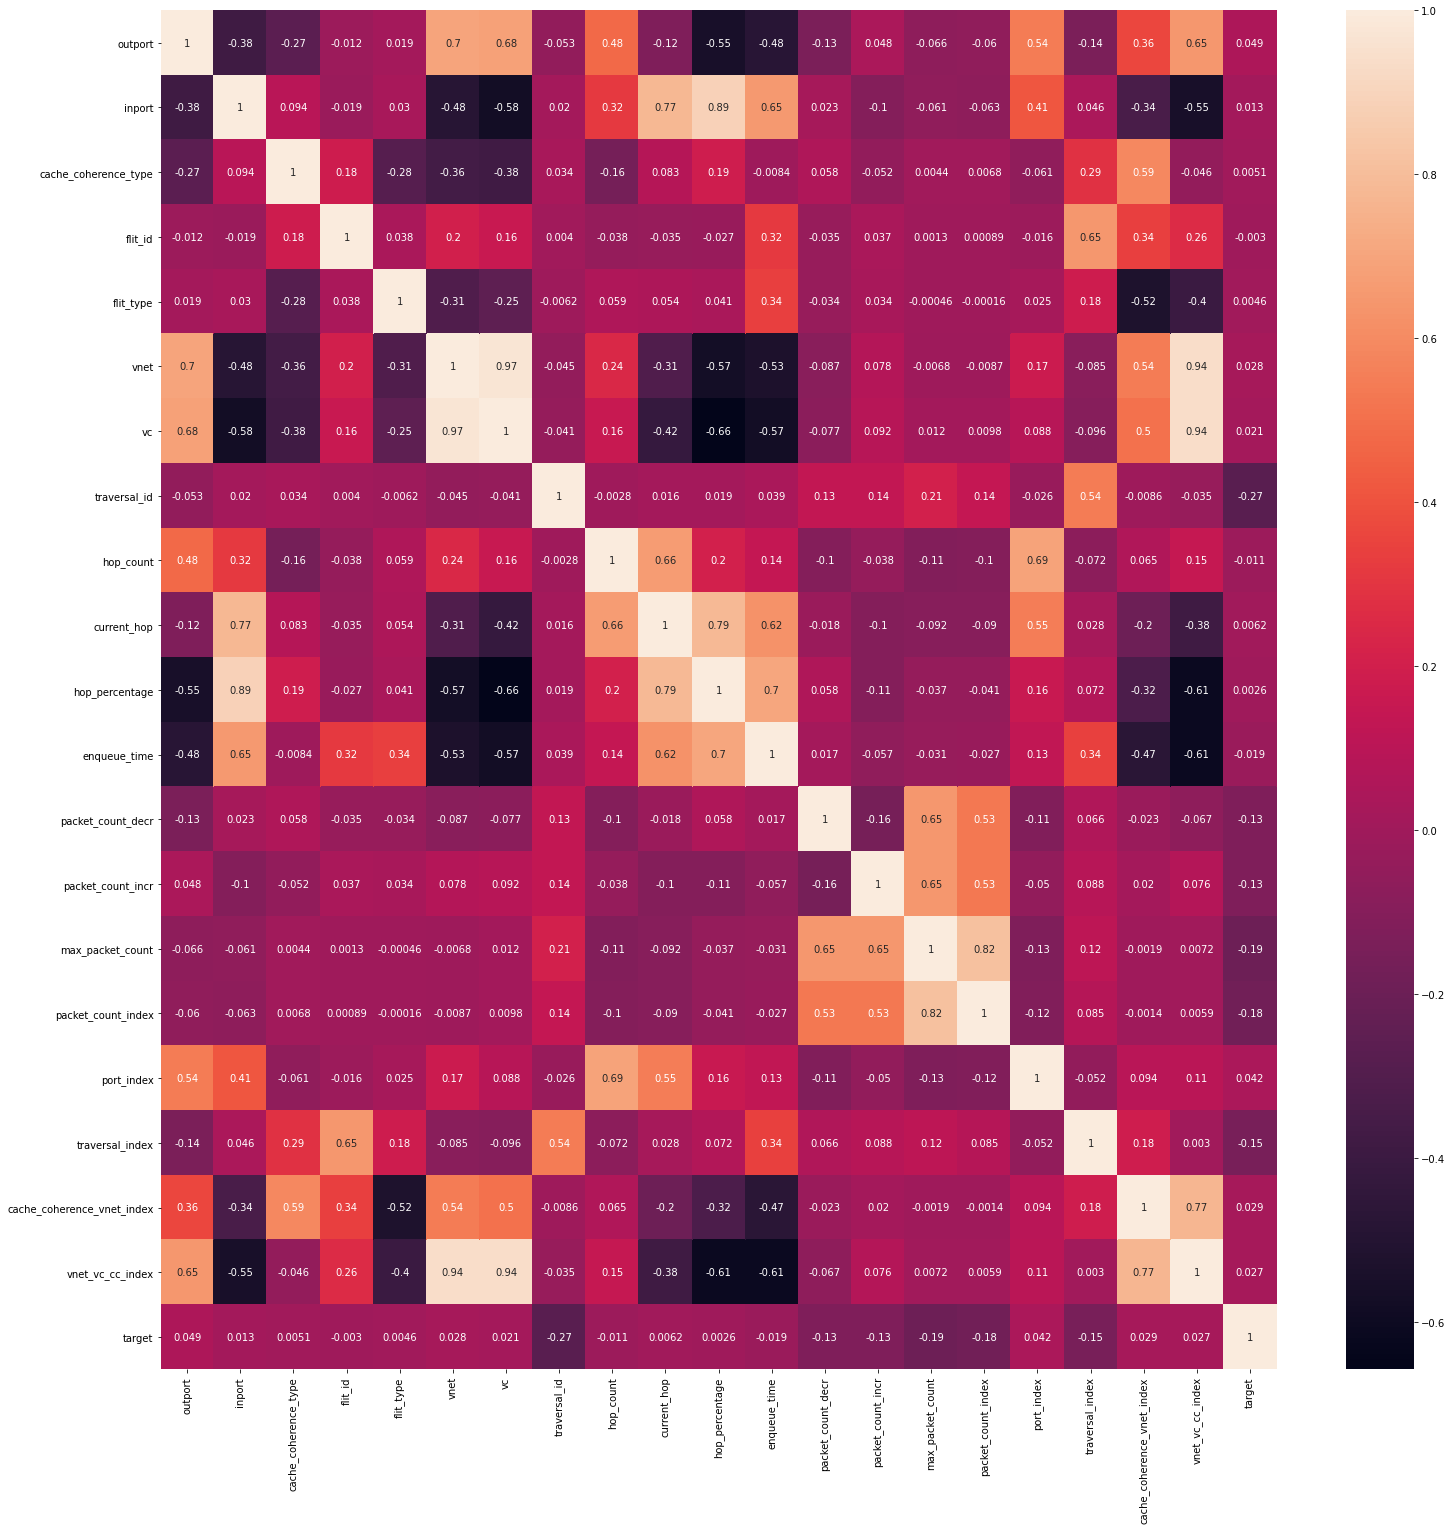

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

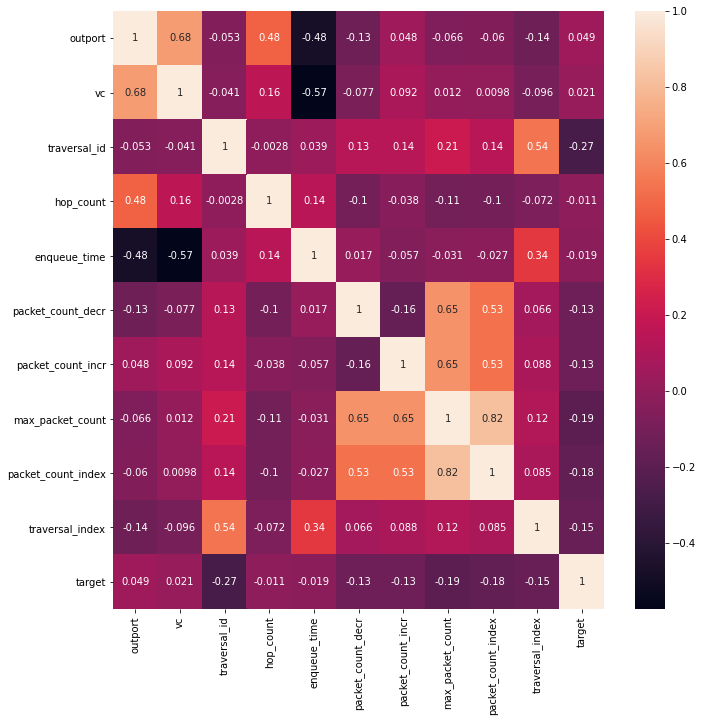

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

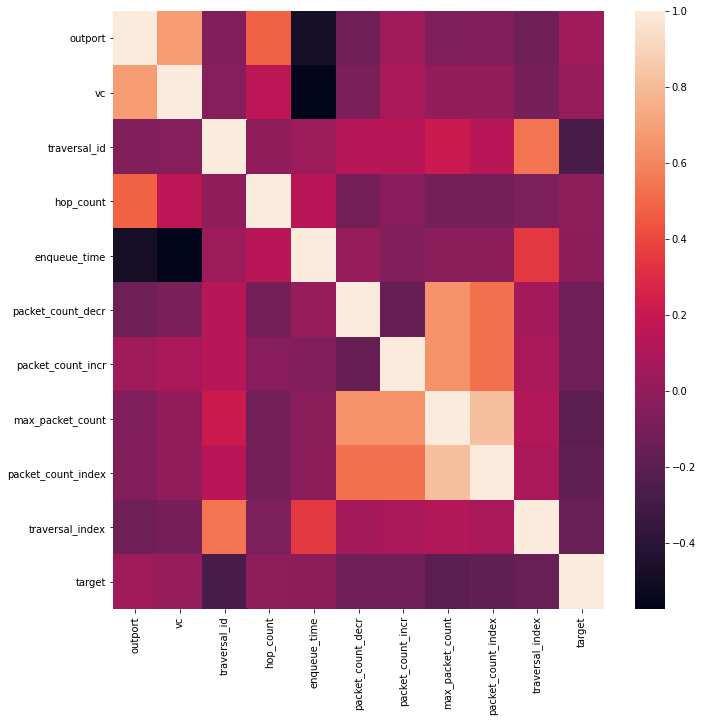

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.000000,0.000000,0.000033,0.500000,0.176471,0.260116,0.000000,0.260116,0.005879,0.000001
1,0.000000,0.000000,0.000033,0.500000,0.176471,0.219653,0.000000,0.219653,0.004964,0.000001
2,0.000000,0.000000,0.000033,0.500000,0.176471,0.260116,0.000000,0.260116,0.005879,0.000001
3,0.000000,0.000000,0.000033,0.500000,0.176471,0.236994,0.000000,0.236994,0.005356,0.000001
4,0.000000,0.000000,0.000033,0.500000,0.191176,0.254335,0.000000,0.254335,0.005748,0.000001
...,...,...,...,...,...,...,...,...,...,...
731051,0.666667,1.000000,1.000000,0.666667,0.000000,0.023121,0.034682,0.057803,0.004442,0.044442
731052,0.666667,1.000000,1.000000,0.666667,0.014706,0.017341,0.040462,0.057803,0.004050,0.177780
731053,0.666667,1.000000,1.000000,0.666667,0.029412,0.011561,0.046243,0.057803,0.003396,0.266672
731054,0.666667,1.000000,1.000000,0.666667,0.044118,0.005780,0.052023,0.057803,0.002482,0.355565


In [22]:
train_X[train_X.duplicated()].shape

(4794, 10)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.000000,0.000000,0.000067,0.666667,0.246154,0.351759,0.000000,0.351759,0.006931,0.000003
1,0.333333,0.727273,0.000000,0.833333,0.246154,0.346734,0.005025,0.351759,0.013764,0.000000
2,0.333333,0.727273,0.000000,0.833333,0.261538,0.341709,0.010050,0.351759,0.020398,0.000009
3,0.333333,0.727273,0.000000,0.833333,0.276923,0.336683,0.015075,0.351759,0.026834,0.000015
4,0.333333,0.727273,0.000000,0.833333,0.292308,0.331658,0.020101,0.351759,0.033073,0.000021
...,...,...,...,...,...,...,...,...,...,...
89915,0.666667,0.909091,1.000000,0.666667,0.015385,0.020101,0.100503,0.120603,0.010298,0.044443
89916,0.666667,0.909091,1.000000,0.666667,0.030769,0.015075,0.105528,0.120603,0.008615,0.177781
89917,0.666667,0.909091,1.000000,0.666667,0.046154,0.010050,0.110553,0.120603,0.006733,0.266673
89918,0.666667,0.909091,1.000000,0.666667,0.061538,0.005025,0.115578,0.120603,0.004654,0.355565


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    540386
1    190670
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  7272.017594
9     traversal_index  2468.646315
7    max_packet_count  2326.143145
8  packet_count_index  2279.889410
6   packet_count_incr  1170.869971
5   packet_count_decr  1155.294531
0             outport   522.450376
1                  vc   103.250540
4        enqueue_time    33.803522
3           hop_count    10.192124


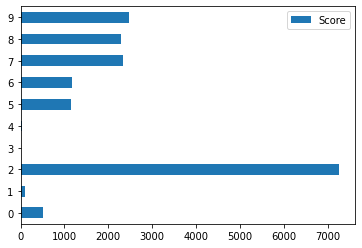

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r8.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.88095286948315
Test Prediction Score 95.25962301315897


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 87.20084519572954
Test Prediction Score 87.76579111944966
Test Prediction Score 88.48568270454024
Test Prediction Score 87.71450416265503
Test Prediction Score 87.88103241980514
Test Prediction Score 86.99953575487858
Test Prediction Score 88.45551086611067
Test Prediction Score 87.0137351808617


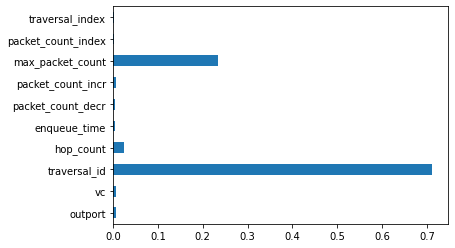

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

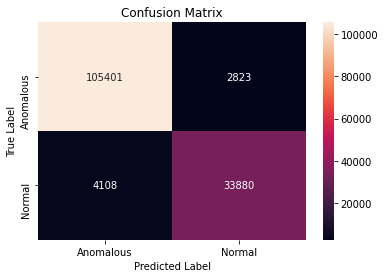

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    108224
           1       0.92      0.89      0.91     37988

    accuracy                           0.95    146212
   macro avg       0.94      0.93      0.94    146212
weighted avg       0.95      0.95      0.95    146212



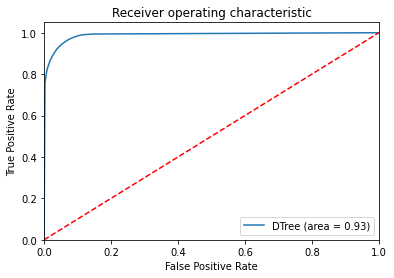

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r8l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.9767459356683
Test Prediction Score 99.6115229940087


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.19483985765125
Test Prediction Score 89.18073796122576
Test Prediction Score 89.91532670128677
Test Prediction Score 88.73676162428498
Test Prediction Score 89.32368526009914
Test Prediction Score 88.79408327596971
Test Prediction Score 89.81226780058522
Test Prediction Score 88.54946787544343


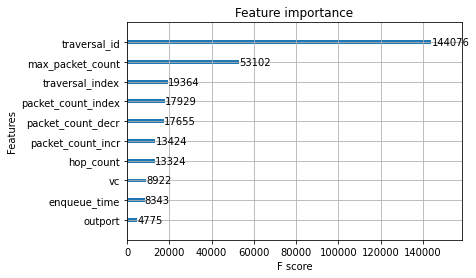

In [52]:
plot_importance(xgbc)
plt.show()

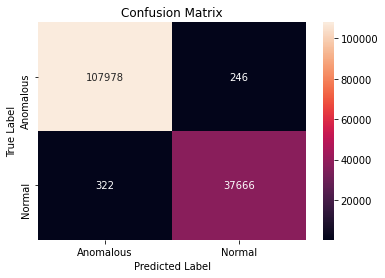

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108224
           1       0.99      0.99      0.99     37988

    accuracy                           1.00    146212
   macro avg       1.00      0.99      0.99    146212
weighted avg       1.00      1.00      1.00    146212



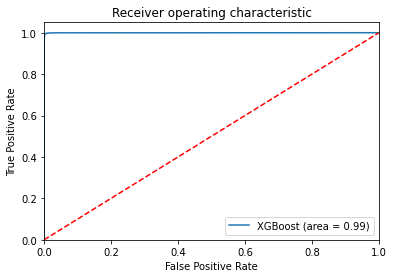

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()